In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# read the data
df = pd.read_csv("netflix_titles.csv")

DATA CLEANING

In [3]:
# print the top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
# print the column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
# check the missing value in the data
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
# check unique values in the data
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [7]:
# check the duplicate value in the data
df.duplicated().any()

False

In [8]:
# make a copy of dataset
data = df.copy()

In [9]:
# check shape of the data
data.shape

(6234, 12)

In [10]:
# drop null value from the data
data.dropna(inplace = True)

In [11]:
# print the data types
data.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
# convert the date time format
data["date_added"] = pd.to_datetime(data['date_added'].str.strip(), format="%B %d, %Y")

In [13]:
# check the shape of the data after dropping null value
data.shape

(3774, 12)

DATA VISUALIZATION

C:\Users\MARG\AppData\Local\Temp\ipykernel_19268\1842220298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')  # Specify the data and x-axis


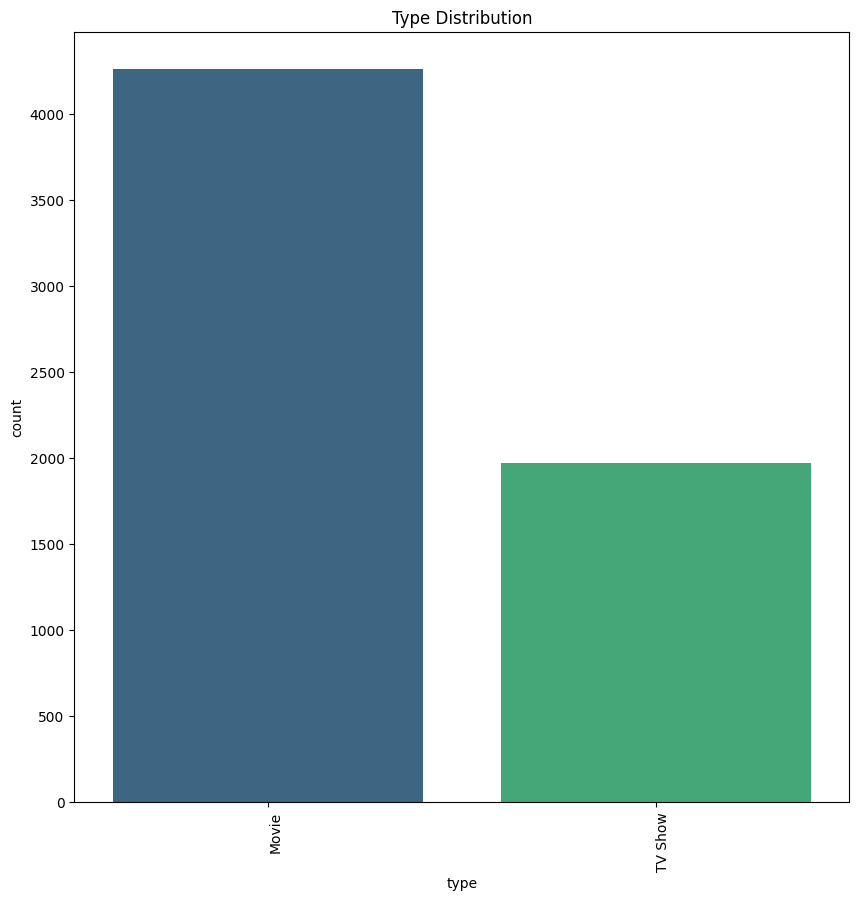

In [14]:
# Type : Movies and TV shows

# Create the count plot
plt.figure(figsize=(10, 10))  # Set the figure size
sns.countplot(data=df, x='type', palette='viridis')  # Specify the data and x-axis

# Rotate x-tick labels
plt.xticks(rotation=90, ha="left")

# Set the title
plt.title('Type Distribution')

# Show the plot
plt.show()

C:\Users\MARG\AppData\Local\Temp\ipykernel_19268\1577166437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')  # Specify the data and x-axis


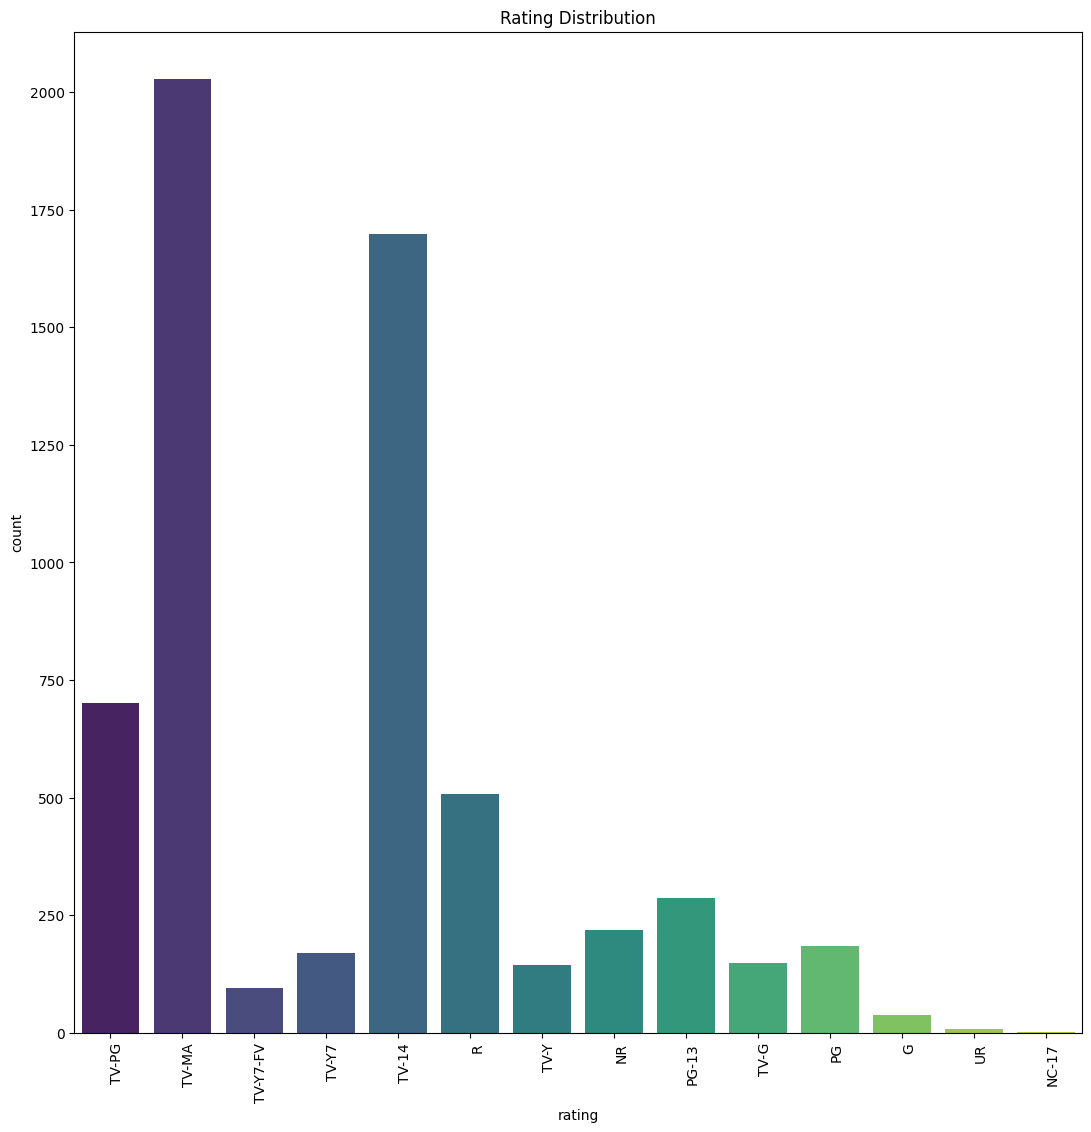

In [15]:
# rating of shows and movies

# Create the count plot
plt.figure(figsize=(13, 13))  # Set the figure size
sns.countplot(data=df, x='rating', palette='viridis')  # Specify the data and x-axis

# Rotate x-tick labels
plt.xticks(rotation=90, ha="left")

# Set the title
plt.title('Rating Distribution')

# Show the plot
plt.show()

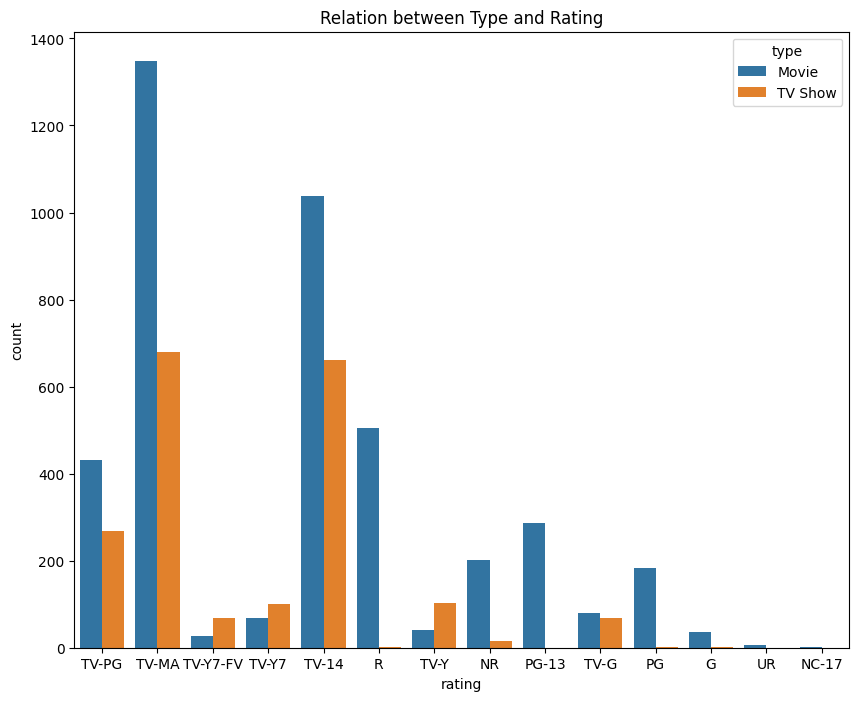

In [16]:
# Relation between type and rating
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

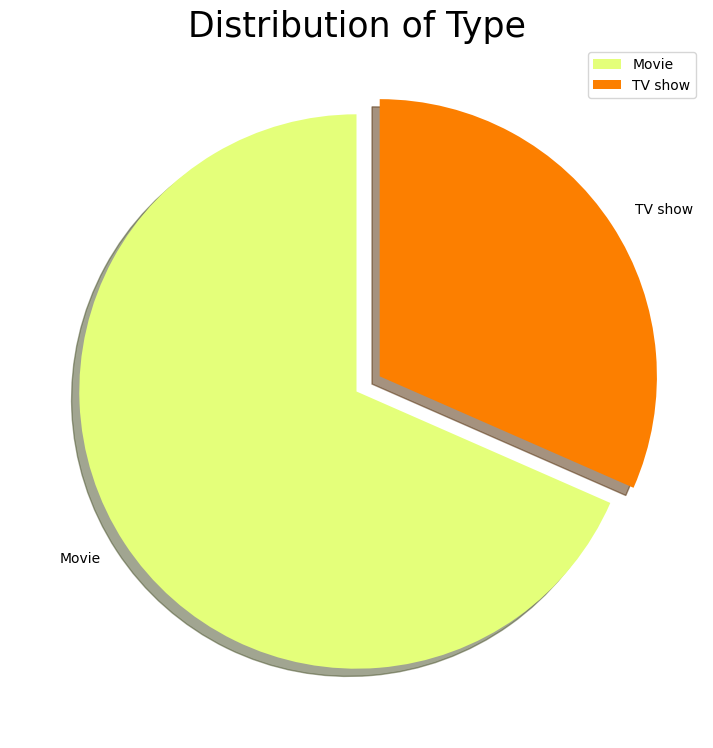

In [17]:
# Pie-chart for the Type: Movie and TV Shows

labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

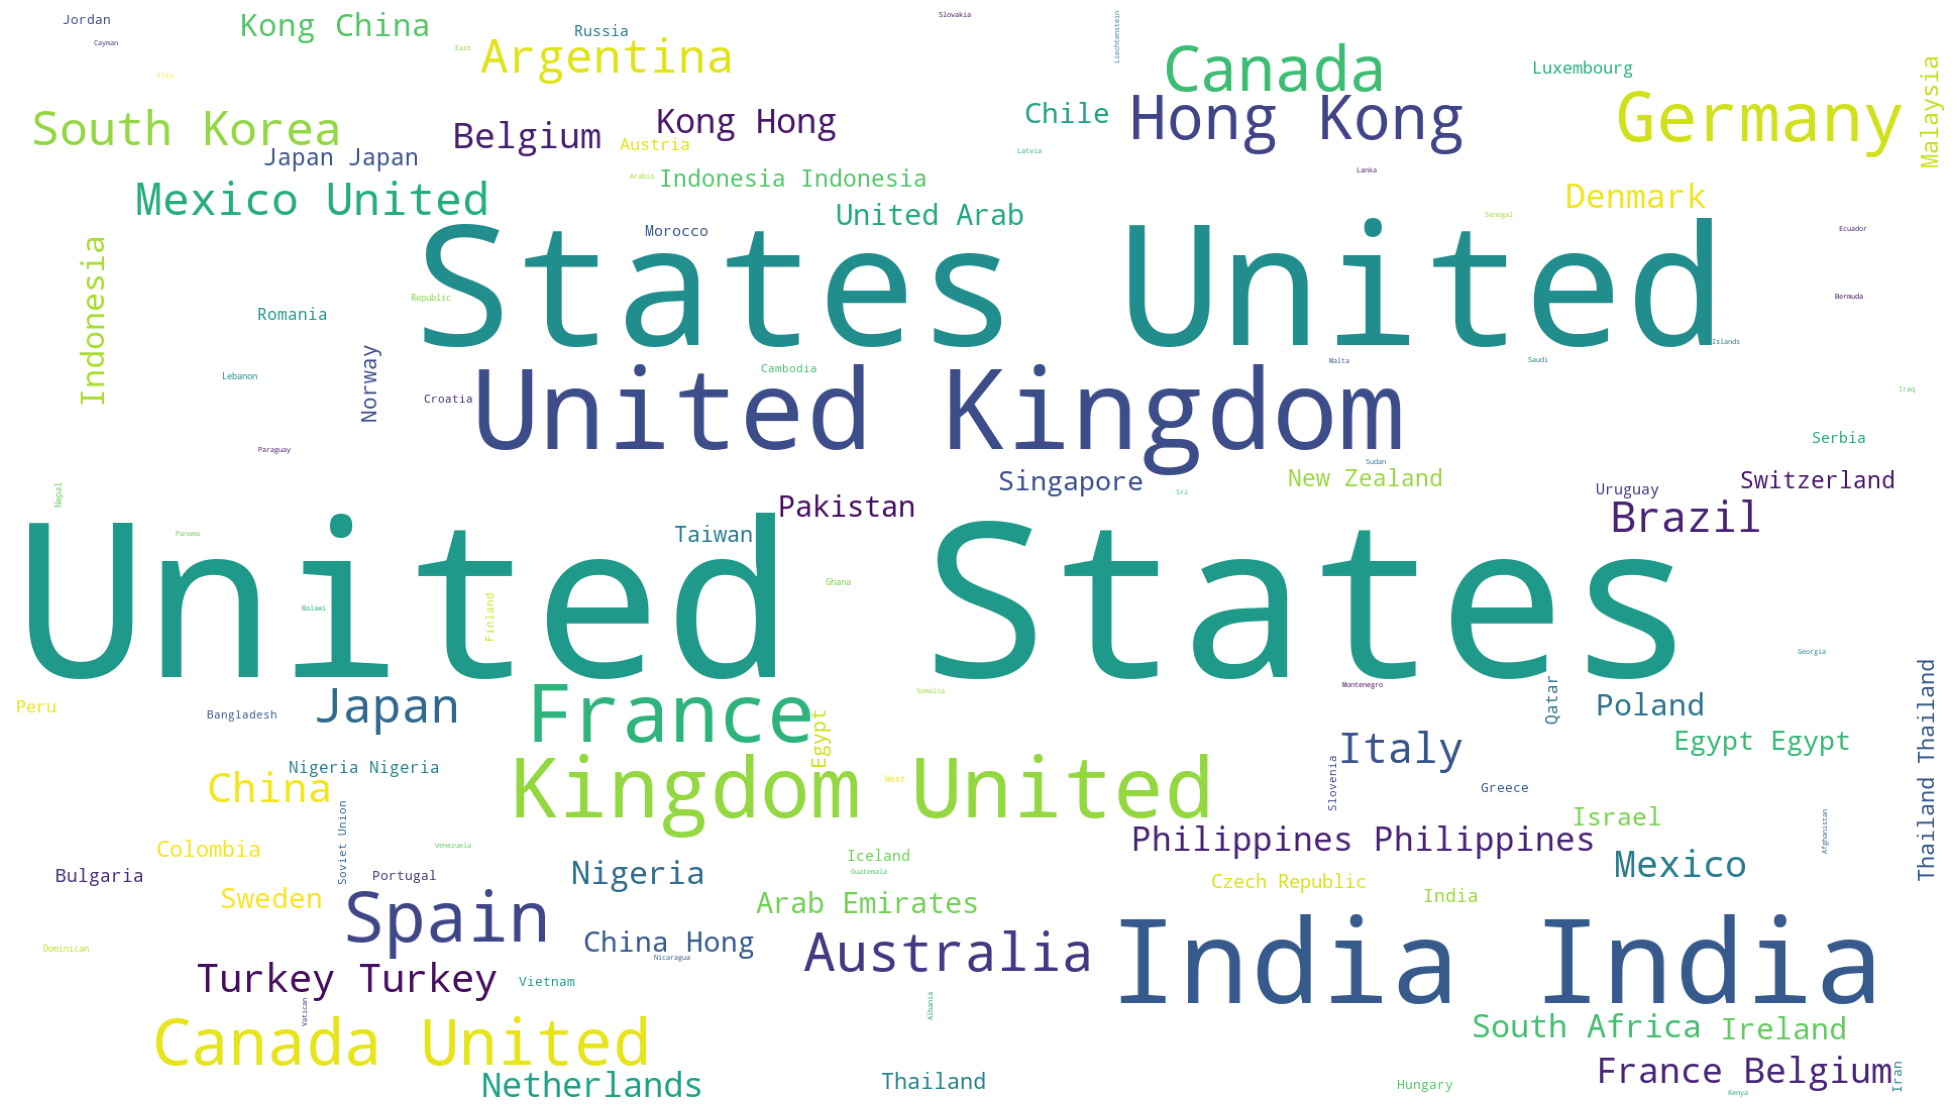

In [23]:
# country

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

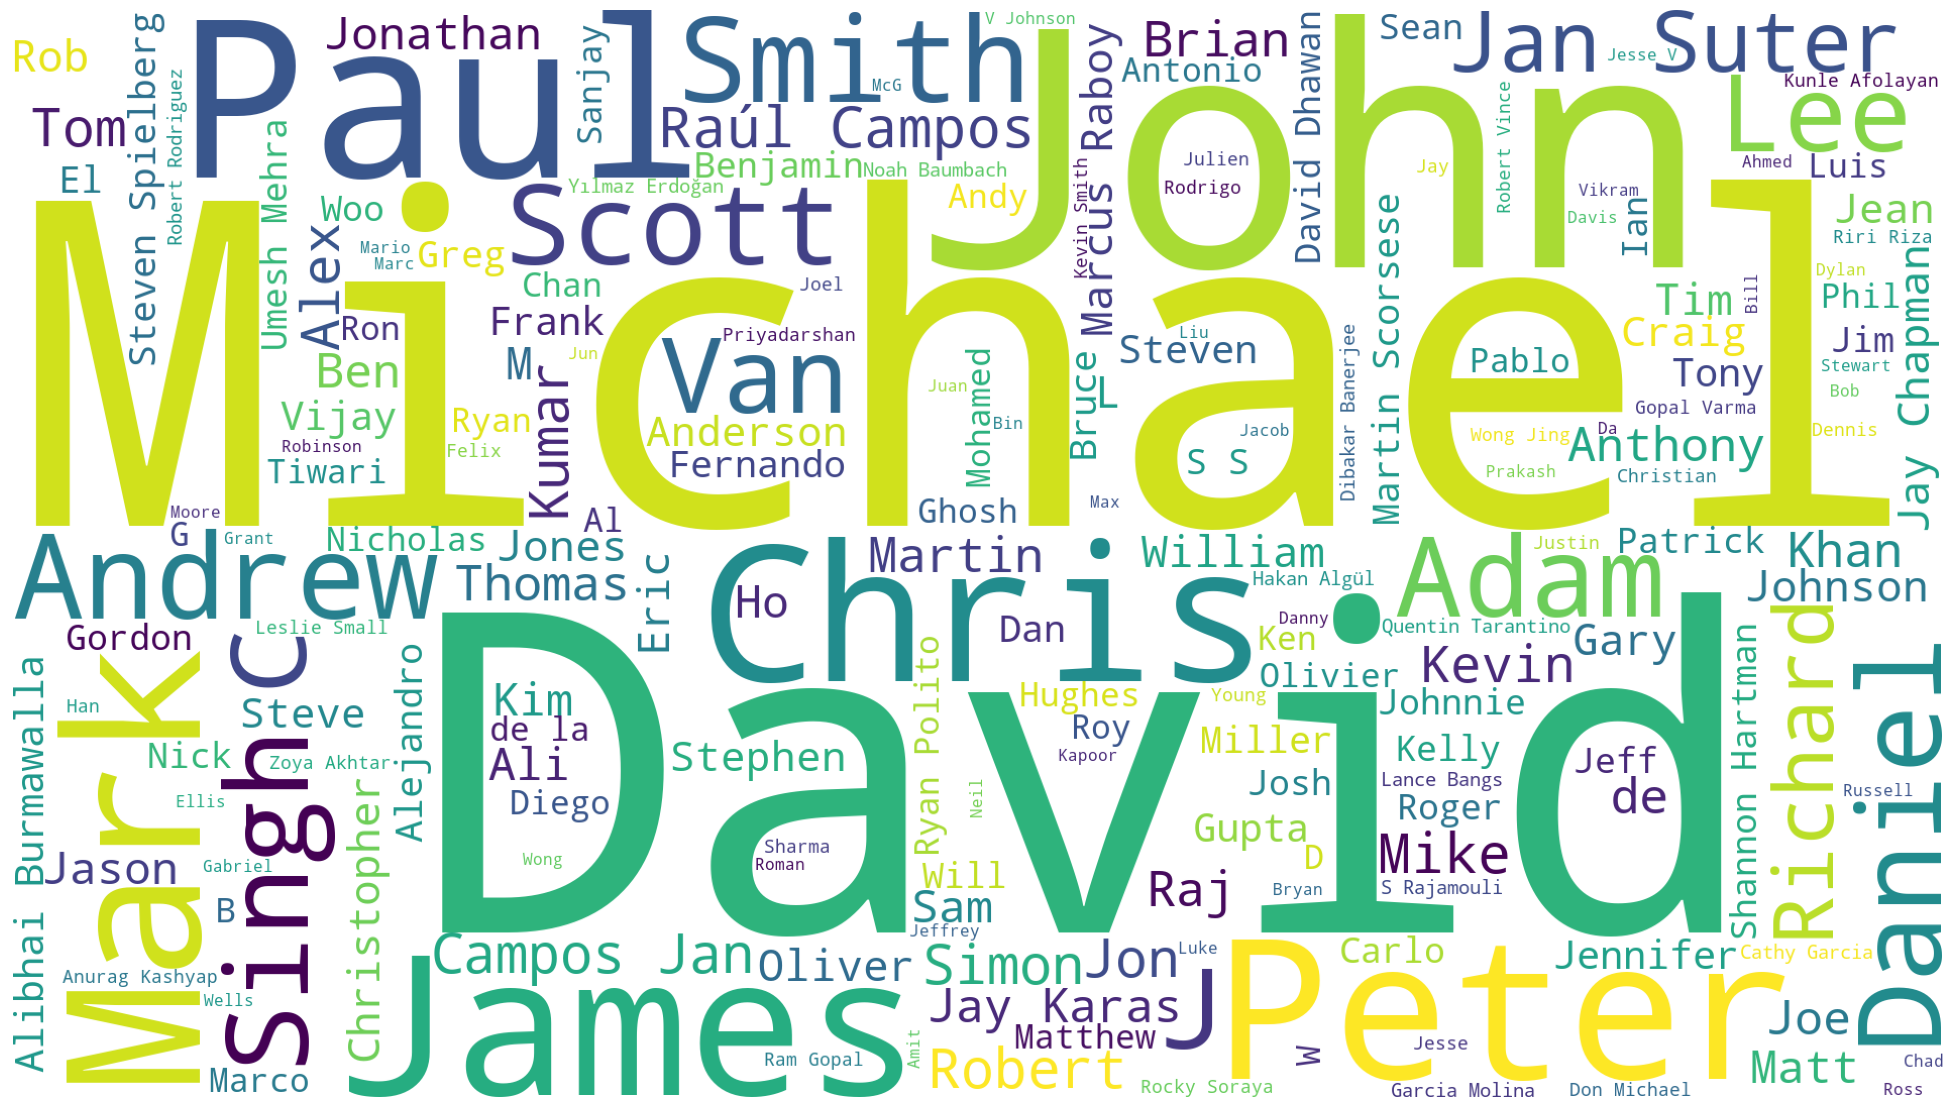

In [22]:
# directors
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()